In [41]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [24]:
df = pd.read_csv('football.csv')
df.head()

,Teams,Seasons,Players,Matches,Goals,Assists,Seasons Ratings
0,InterMiami,2024,Lionel Messi,15,14,11,8.5
1,InterMiami,2023,Lionel Messi,14,11,5,8.0
2,PSG,2022/2023,Lionel Messi,41,21,20,8.1
3,PSG,2021/2022,Lionel Messi,34,11,14,7.9
4,Barcelona,2020/2021,Lionel Messi,47,38,12,8.4


In [25]:
# shape
df.shape

(1216, 7)

In [26]:
# info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1216 entries, 0 to 1215
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Teams            1216 non-null   object 
 1   Seasons          1216 non-null   object 
 2   Players          1216 non-null   object 
 3   Matches          1216 non-null   int64  
 4   Goals            1216 non-null   int64  
 5   Assists          1216 non-null   int64  
 6   Seasons Ratings  1216 non-null   float64
dtypes: float64(1), int64(3), object(3)
memory usage: 66.6+ KB


In [27]:
# describe
df.describe()

,Matches,Goals,Assists,Seasons Ratings
count,1216.000000,1216.000000,1216.000000,1216.000000
mean,37.024671,8.059211,4.797697,7.111595
std,11.762088,9.351558,4.496019,0.410907
min,1.000000,0.000000,0.000000,5.100000
25%,31.000000,2.000000,1.000000,6.900000
50%,39.000000,4.000000,4.000000,7.100000
75%,46.000000,12.000000,7.000000,7.300000
max,59.000000,55.000000,25.000000,8.900000


In [28]:
# outliers

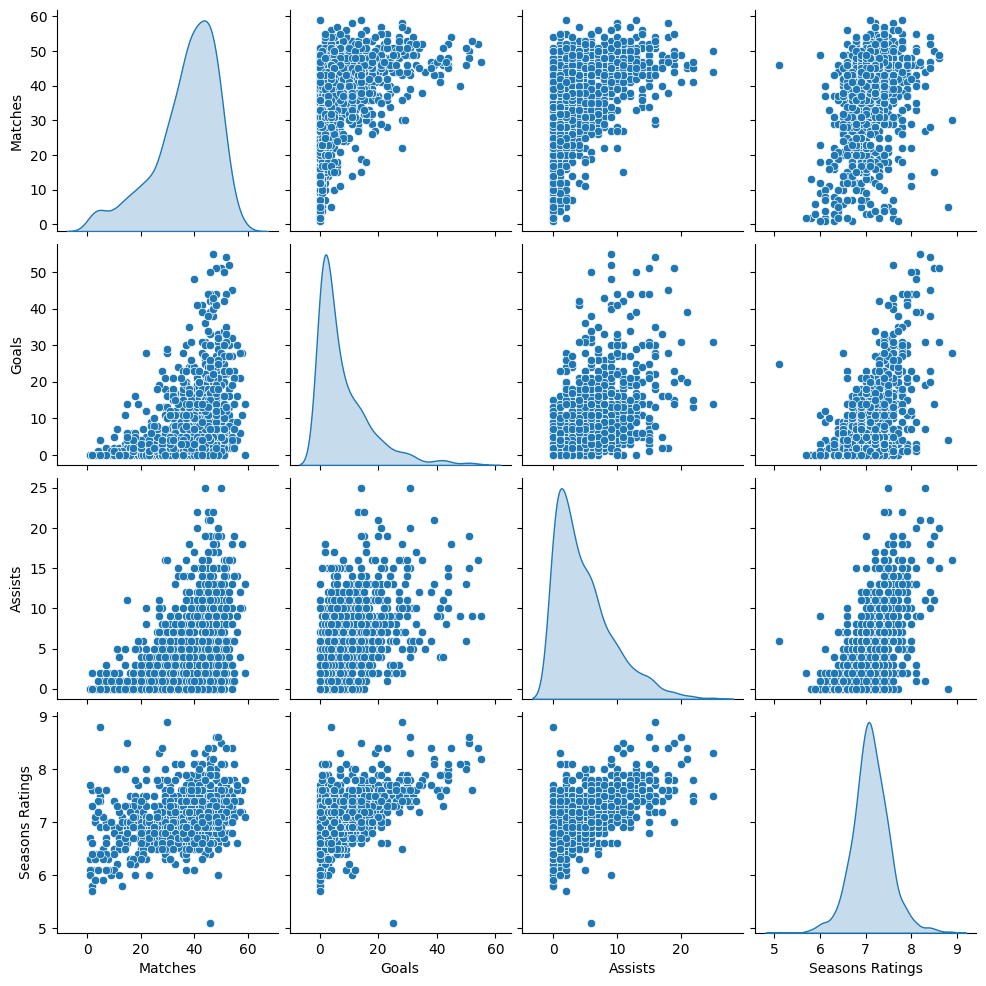

In [29]:
sns.pairplot(df,diag_kind = 'kde')

In [30]:
numerical_features = df.select_dtypes(include=['number']).columns.to_list()
numerical_features

['Matches', 'Goals', 'Assists', 'Seasons Ratings']

<Axes: >

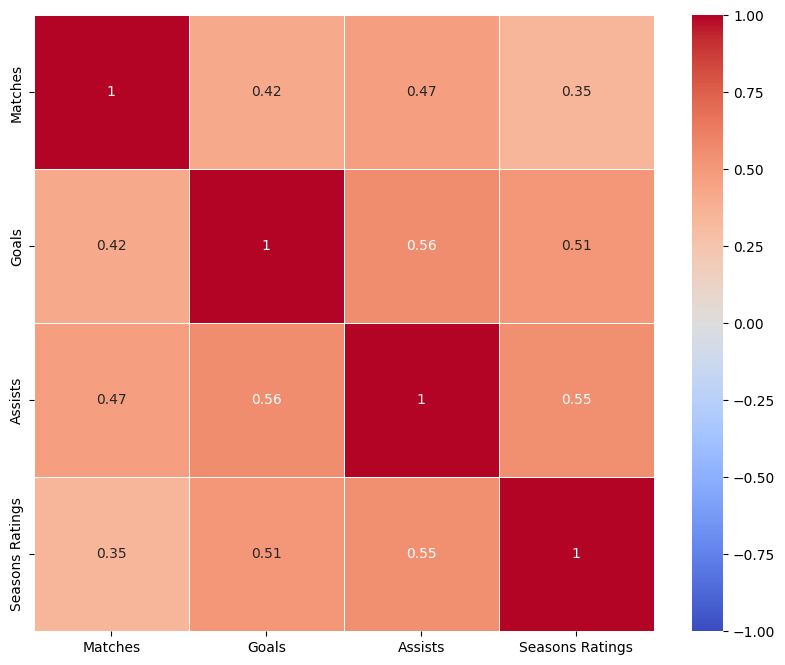

In [31]:
plt.figure(figsize=(10, 8))

correlation_matrix = df[numerical_features].corr().round(2)
 
# Untuk menge-print nilai di dalam kotak, gunakan parameter anot=True
sns.heatmap(data=correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, vmin=-1, vmax=1)


> Semua kolom numerik saling berkolerasi selaras satu sama lain

In [32]:
df = df.select_dtypes(include=['number'])
df.head()

,Matches,Goals,Assists,Seasons Ratings
0,15,14,11,8.5
1,14,11,5,8.0
2,41,21,20,8.1
3,34,11,14,7.9
4,47,38,12,8.4


In [33]:
# scaler = StandardScaler()
# df = scaler.fit_transform(df)
# df

In [39]:
y = df['Seasons Ratings']
X = df.drop('Seasons Ratings', axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [52]:
model = LinearRegression()
model.fit(X_train, y_train)
print(model.coef_)

[0.00233832 0.01221142 0.03385755]


In [43]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Membuat prediksi pada testing set
y_pred = model.predict(X_test)

# Mengevaluasi kinerja model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'MAE: {mae}')
print(f'MSE: {mse}')
print(f'R-squared: {r2}')

MAE: 0.23837892252989795
MSE: 0.1023417301955823
R-squared: 0.33516239549005167


In [44]:
coefficients = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient'])
print(coefficients)

         Coefficient
Matches     0.002338
Goals       0.012211
Assists     0.033858


In [45]:
coefficients = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient'])
print(coefficients)

         Coefficient
Matches     0.002338
Goals       0.012211
Assists     0.033858


In [49]:
# Membuat prediksi untuk data training dan testing
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Menggabungkan nilai sebenarnya dan prediksi untuk visualisasi
train_results = pd.DataFrame({'Actual': y_train, 'Predicted': y_train_pred})
test_results = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})

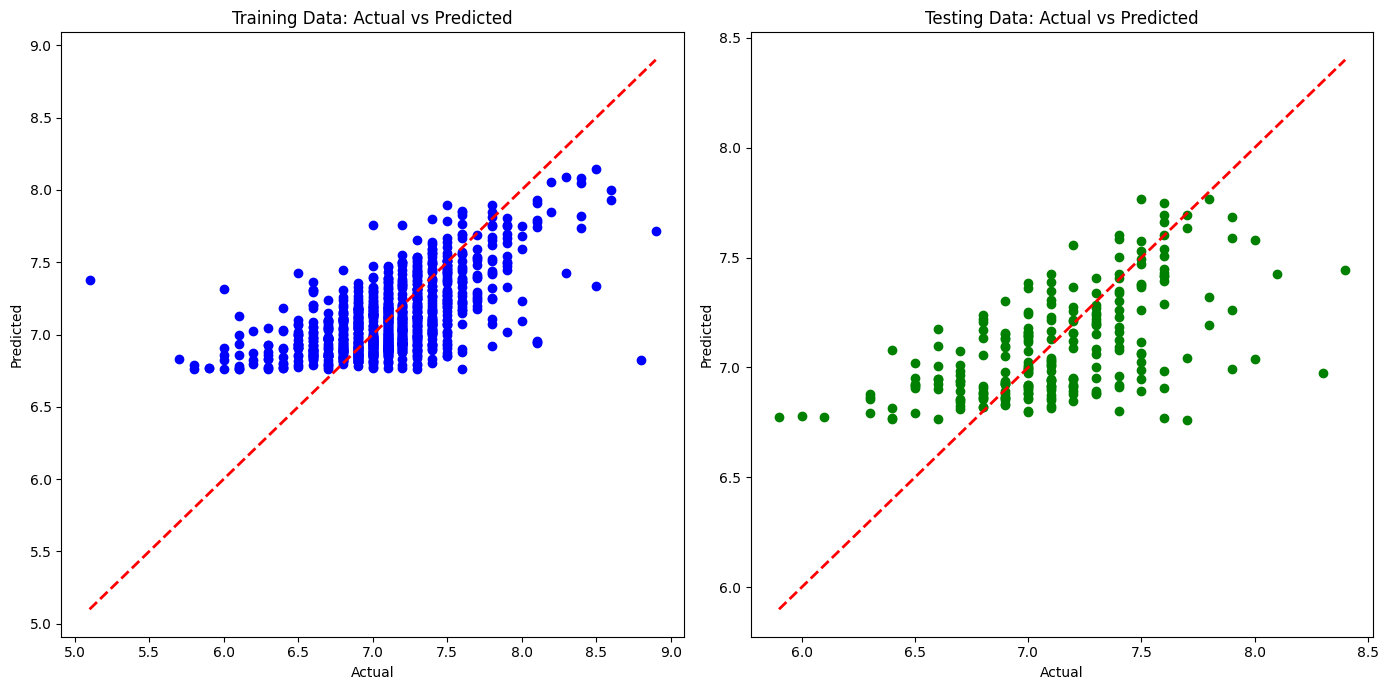

In [50]:
import matplotlib.pyplot as plt

# Visualisasi hasil pada data training
plt.figure(figsize=(14, 7))

plt.subplot(1, 2, 1)
plt.scatter(train_results['Actual'], train_results['Predicted'], color='blue')
plt.plot([train_results['Actual'].min(), train_results['Actual'].max()],
         [train_results['Actual'].min(), train_results['Actual'].max()],
         'r--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Training Data: Actual vs Predicted')

# Visualisasi hasil pada data testing
plt.subplot(1, 2, 2)
plt.scatter(test_results['Actual'], test_results['Predicted'], color='green')
plt.plot([test_results['Actual'].min(), test_results['Actual'].max()],
         [test_results['Actual'].min(), test_results['Actual'].max()],
         'r--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Testing Data: Actual vs Predicted')

plt.tight_layout()
plt.show()


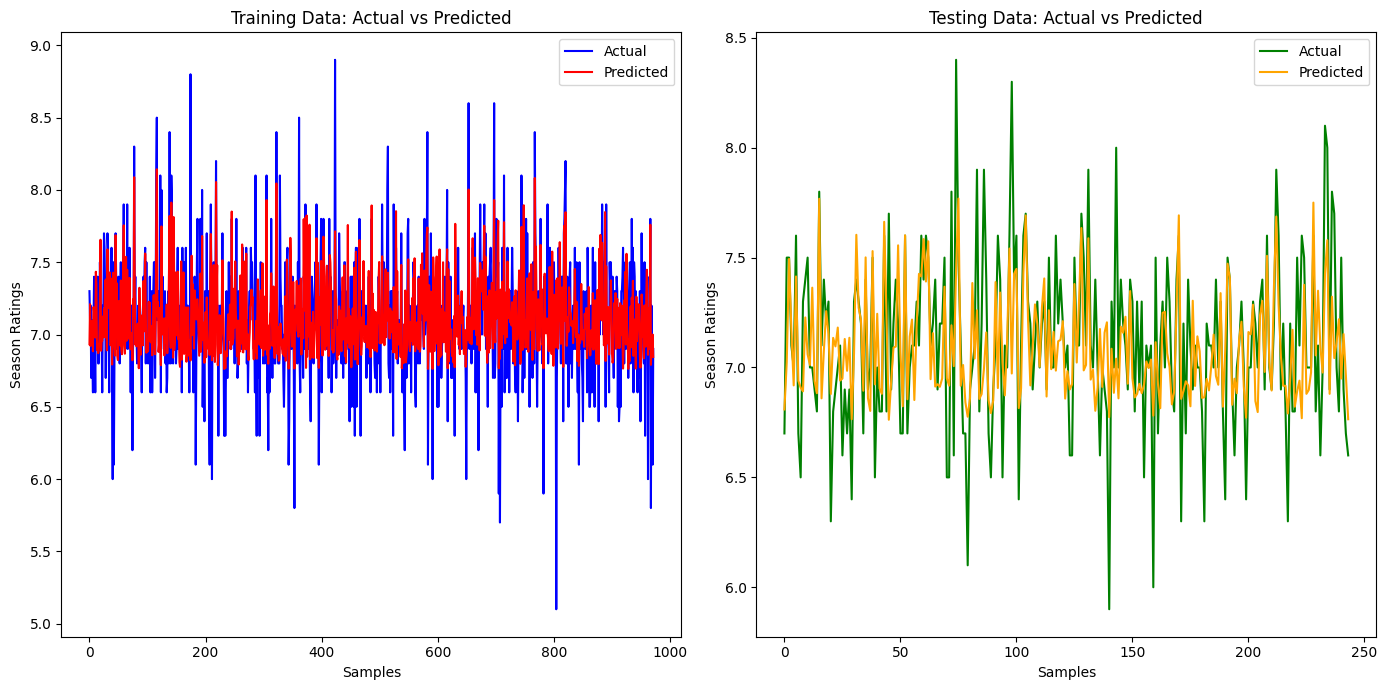

In [51]:
# Visualisasi hasil pada data training dengan line plot
plt.figure(figsize=(14, 7))

plt.subplot(1, 2, 1)
plt.plot(train_results['Actual'].values, label='Actual', color='blue')
plt.plot(train_results['Predicted'].values, label='Predicted', color='red')
plt.xlabel('Samples')
plt.ylabel('Season Ratings')
plt.title('Training Data: Actual vs Predicted')
plt.legend()

# Visualisasi hasil pada data testing dengan line plot
plt.subplot(1, 2, 2)
plt.plot(test_results['Actual'].values, label='Actual', color='green')
plt.plot(test_results['Predicted'].values, label='Predicted', color='orange')
plt.xlabel('Samples')
plt.ylabel('Season Ratings')
plt.title('Testing Data: Actual vs Predicted')
plt.legend()

plt.tight_layout()
plt.show()


## business understanding
## data understanding 
## data preparation
## modeling 
## evaluasi